Runge-Kutta Segundo Orden

Estimado[xi,yi]
[[-1.00000000e+00  1.00000000e+00]
 [-5.00000000e-01  1.31250000e+00]
 [ 0.00000000e+00  2.47656250e+00]
 [ 5.00000000e-01  4.71191406e+00]
 [ 1.00000000e+00  8.37561035e+00]
 [ 1.50000000e+00  1.40478668e+01]
 [ 2.00000000e+00  2.26715336e+01]
 [ 2.50000000e+00  3.57787421e+01]
 [ 3.00000000e+00  5.58592059e+01]
 [ 3.50000000e+00  8.69587095e+01]
 [ 4.00000000e+00  1.35651653e+02]
 [ 4.50000000e+00  2.12621436e+02]
 [ 5.00000000e+00  3.35228584e+02]
 [ 5.50000000e+00  5.31683949e+02]
 [ 6.00000000e+00  8.47830166e+02]
 [ 6.50000000e+00  1.35816152e+03]]
Error máximo estimado:  644.2698873196488
Entre puntos:  [-6.32120559e-01 -9.55969340e-01 -1.47656250e+00 -2.31319279e+00
 -3.65732852e+00 -5.81617775e+00 -9.28247749e+00 -1.48462481e+01
 -2.37736689e+01 -3.80932576e+01 -6.10535030e+01 -9.78543048e+01
 -1.56815425e+02 -2.51242016e+02 -4.02401373e+02 -6.44269887e+02]


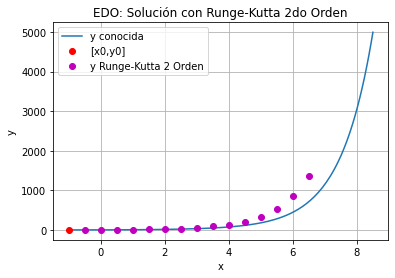

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def rungekutta2(d1y,x0,y0,h,muestras):
    tamano   = muestras + 1
    estimado = np.zeros(shape=(tamano,2),dtype=float)
    # incluye el punto [x0,y0]
    estimado[0] = [x0,y0]
    xi = x0
    yi = y0
    for i in range(1,tamano,1):
        K1 = h * d1y(xi,yi)
        K2 = h * d1y(xi+h, yi + K1)

        yi = yi + (K1+K2)/2
        xi = xi + h
        
        estimado[i] = [xi,yi]
        
    return(estimado)

# PROGRAMA PRUEBA Segundo Orden
# prueba y'-y-x+(x**2)-1 =0, y(0)=1


# INGRESO
# d1y = y' = f, d2y = y'' = f'
d1y = lambda x,y: y - x**2 + x + 1
x0 = -1
y0 = 1
h  = 0.5
muestras = 15

# PROCEDIMIENTO
puntosRK2 = rungekutta2(d1y,x0,y0,h,muestras)
xi = puntosRK2[:,0]
yiRK2 = puntosRK2[:,1]

# SALIDA
print('Estimado[xi,yi]')
print(puntosRK2)

# ERROR vs solución conocida
y_sol = lambda x: ((np.e)**x) + x + x**2

yi_psol  = y_sol(xi)
errores  = yi_psol - yiRK2
errormax = np.max(np.abs(errores))

# SALIDA
print('Error máximo estimado: ',errormax)
print('Entre puntos: ', errores)

# GRAFICA [a,b+2*h]
a = x0
b = h*muestras+2*h
muestreo = 10*muestras+2
xis = np.linspace(a,b,muestreo)
yis = y_sol(xis)

# Gráfica

plt.plot(xis,yis, label='y conocida')
plt.plot(xi[0],yiRK2[0],
         'o',color='r', label ='[x0,y0]')
plt.plot(xi[1:],yiRK2[1:],
         'o',color='m',
         label ='y Runge-Kutta 2 Orden')

plt.title('EDO: Solución con Runge-Kutta 2do Orden')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Runge-Kutta Cuarto Orden

Estimado[xi,yi]
[[  0.           1.        ]
 [  0.4          2.05152   ]
 [  0.8          3.66473677]
 [  1.2          5.95850066]
 [  1.6          9.11010472]
 [  2.          13.38402288]
 [  2.4         19.17477973]
 [  2.8         27.07090075]
 [  3.2         37.95030902]
 [  3.6         53.12263164]
 [  4.          74.54148303]
 [  4.4        105.12113496]
 [  4.8        149.20890372]
 [  5.2        213.28982597]
 [  5.6        307.03784706]]
Error máximo estimado:  0.3485603622493727
Entre puntos:  [0.00000000e+00 3.04697641e-04 8.04160492e-04 1.61626135e-03
 2.92770445e-03 5.03321803e-03 8.39664845e-03 1.37460186e-02
 2.22211812e-02 3.56028077e-02 5.66670008e-02 8.97337094e-02
 1.41513801e-01 2.22415903e-01 3.48560362e-01]


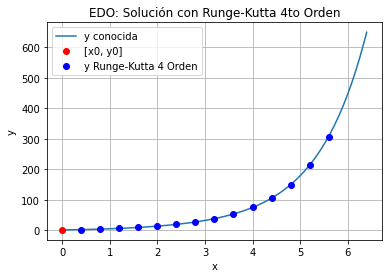

In [44]:
def rungekutta4(d1y,x0,y0,h,muestras):
    tamano = muestras + 1
    estimado = np.zeros(shape=(tamano,2), dtype=float)
    estimado[0] = [x0, y0]
    xi = x0
    yi = y0
    
    for i in range(1, tamano):
        K1 = h * d1y(xi, yi)
        K2 = h * d1y(xi + 0.5*h, yi + 0.5*K1)
        K3 = h * d1y(xi + 0.5*h, yi + 0.5*K2)
        K4 = h * d1y(xi + h, yi + K3)
        
        yi = yi + (K1 + 2*K2 + 2*K3 + K4) / 6
        xi = xi + h
        
        estimado[i] = [xi, yi]
        
    return estimado

# PROGRAMA PRUEBA Cuarto Orden
# prueba y'-y-x+(x**2)-1 =0, y(0)=1


# INGRESO
# d1y = y' = f, d2y = y'' = f'
# Definición de la función que describe la derivada de y
d1y = lambda x, y: y - x**2 + x + 1

# Punto inicial (x0, y0)
x0 = 0
y0 = 1

# Tamaño del paso y número de muestras
h = 0.4
muestras = 14


# PROCEDIMIENTO
puntosRK4 = rungekutta4(d1y, x0, y0, h, muestras)
xi4 = puntosRK4[:,0]
yiRK4 = puntosRK4[:,1]

# SALIDA
print('Estimado[xi,yi]')
print(puntosRK4)

# ERROR vs solución conocida
y_sol = lambda x: ((np.e)**x) + x + x**2

yi_psol  = y_sol(xi4)
errores  = yi_psol - yiRK4
errormax = np.max(np.abs(errores))

# SALIDA
print('Error máximo estimado: ',errormax)
print('Entre puntos: ', errores)

# GRAFICA [a,b+2*h]
a = x0
b = h*muestras+2*h
muestreo = 10*muestras+2
xis = np.linspace(a,b,muestreo)
yis = y_sol(xis)

# Gráfica

plt.plot(xis, yis, label='y conocida')
plt.plot(xi4[0], yiRK4[0], 'o', color='r', label='[x0, y0]')
plt.plot(xi4[1:], yiRK4[1:], 'o', color='b', label='y Runge-Kutta 4 Orden')

plt.title('EDO: Solución con Runge-Kutta 4to Orden')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()